# Data Analysis

The Notebook has added support for `raw_input` and `%debug`, as of 1.0.

/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1298: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=16.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1298: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=20.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1298: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:wei

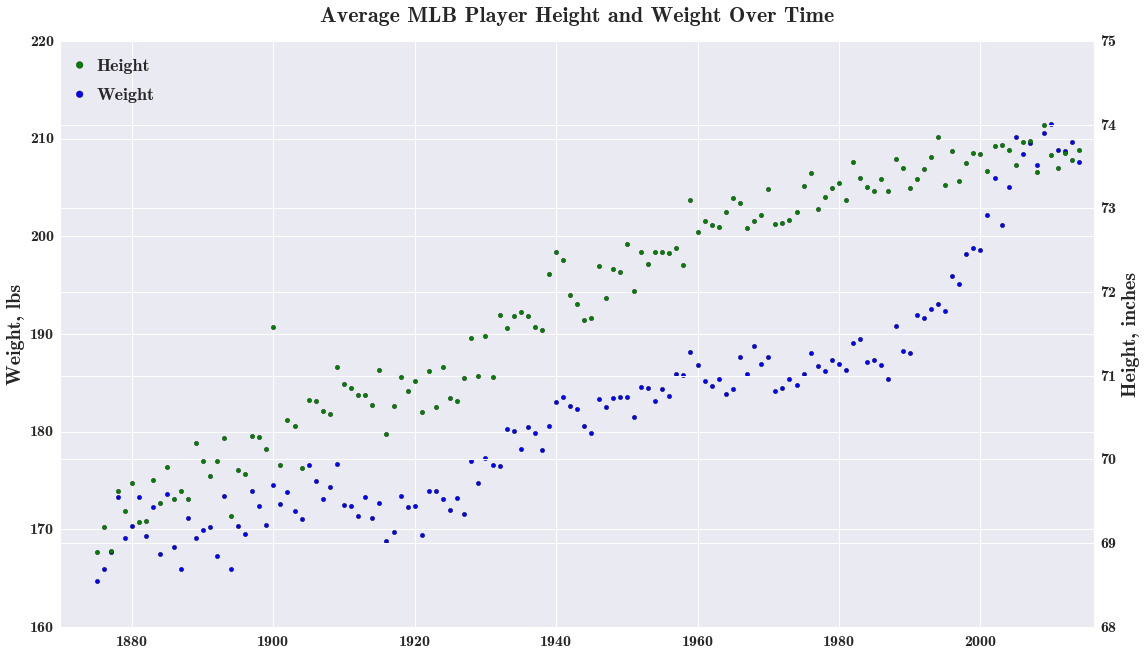

In [1]:
###HEIGHT AND WEIGHT

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%pylab inline

master = pd.read_csv("../data_sets/baseballdatabank-master/core/Master.csv")
salaries = pd.read_csv("../data_sets/baseballdatabank-master/core/Salaries.csv")

salary_merge = pd.merge(master, salaries, on='playerID', how='inner')
#x.x = x.x.astype(str)
salary_merge.debut = salary_merge.debut.astype(str)
master.debut = master.debut.astype(str)

years = []
weights = []
heights = []

for i in range(1875, 2015):
    bool_array = master['debut'].str.contains(str(i))
    weights.append(master[bool_array]['weight'].mean())
    heights.append(master[bool_array]['height'].mean())
    years.append(i)
    
fig, ax1 = plt.subplots()

ax1.scatter(years, weights, c='blue', label='Weight')
ax1.tick_params(labelsize=16)
ax1.set_xlim([1870, 2016])
#plt.xlabel('Year', fontsize=18)
plt.ylabel('Weight, lbs', fontsize=20)
plt.title('Average MLB Player Height and Weight Over Time', fontsize=22, y=1.025)
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95), fontsize=18, markerscale=1.5, handlelength=.25)

ax2 = ax1.twinx()
ax2.scatter(years, heights, c='green', label='Height')
ax2.tick_params(labelsize=16)
ax2.set_ylabel('Height, inches', fontsize=20)
ax2.set_xlim([1870, 2016])
ax2.legend(loc='upper left', fontsize=18, markerscale=1.5, handlelength=.25)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('weight_years.png', dpi=100)